# Descripción

Clasificación binaria entre Masas y Calcificaciones. **Experimento M-C.**
- El tamaño de las imágenes  es de 224x22
- Las etiquetas se generan aquí
- NO se toman en cuenta las imágenes BWC

In [1]:
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt

# Cargamos las  rutas de las imágenes:

MASAS:

In [2]:
rutas_train_mass_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_mass_BENIGN_577.npy')

In [3]:
len(rutas_train_mass_benign)

577

In [4]:
rutas_test_mass_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_mass_BENIGN_194.npy')

In [5]:
len(rutas_test_mass_benign)

194

In [6]:
rutas_train_mass_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_mass_MALIGNANT_637.npy')

In [7]:
len(rutas_train_mass_malignant)

637

In [8]:
rutas_test_mass_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_mass_MALIGNANT_147.npy')

In [9]:
len(rutas_test_mass_malignant)

147

Calcificaciones

In [11]:
rutas_train_calc_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_calc_BENIGN_528.npy')

In [12]:
len(rutas_train_calc_benign)

528

In [13]:
rutas_test_calc_benign = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_calc_BENIGN_130.npy')

In [14]:
len(rutas_test_calc_benign)

130

In [15]:
rutas_train_calc_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_train_calc_MALIGNANT_544.npy')

In [16]:
len(rutas_train_calc_malignant)

544

In [17]:
rutas_test_calc_malignant = np.load(r'E:\Pruebas Parches Resize con TF\RUTAS por etiquetas\rutas_test_calc_MALIGNANT_129.npy')

In [18]:
len(rutas_test_calc_malignant)

129

# Generamos las etiquetas (numericas) para ingresarlas al modelo

Masas = 0

In [26]:
etiq_train_mass = np.zeros(len(rutas_train_mass_benign)+len(rutas_train_mass_malignant), dtype=int)

In [27]:
len(etiq_train_mass)

1214

In [28]:
etiq_test_mass = np.zeros(len(rutas_test_mass_benign)+len(rutas_test_mass_malignant), dtype=int)

In [29]:
len(etiq_test_mass)

341

Calcificaciones = 1

In [30]:
etiq_train_calc = np.ones(len(rutas_train_calc_benign)+len(rutas_train_calc_malignant), dtype=int)

In [31]:
len(etiq_train_calc)

1072

In [32]:
etiq_test_calc = np.ones(len(rutas_test_calc_benign)+len(rutas_test_calc_malignant), dtype=int)

In [33]:
len(etiq_test_calc)

259

In [34]:
1214+341+1072+259

2886

# Concatenamos las rutas de las imagenes
Se concatenan por anormalidades (Masas y Calcificaciones). Queremos distinguir entre estas (0-1).

In [35]:
rutas_train_mass = np.concatenate((rutas_train_mass_benign,rutas_train_mass_malignant)) #Masas B , M

In [36]:
len(rutas_train_mass)

1214

In [37]:
rutas_test_mass = np.concatenate((rutas_test_mass_benign,rutas_test_mass_malignant)) #Masas B , M

In [38]:
len(rutas_test_mass)

341

In [39]:
rutas_train_calc = np.concatenate((rutas_train_calc_benign,rutas_train_calc_malignant)) #Calc B , M

In [40]:
len(rutas_train_calc)

1072

In [41]:
rutas_test_calc = np.concatenate((rutas_test_calc_benign,rutas_test_calc_malignant)) #Calc B , M

In [42]:
len(rutas_test_calc)

259

# Creamos los conjuntos Train, Validación
Usamos  **train_test_split** de sklearn para su reproducibilidad.

In [44]:
X = np.concatenate((rutas_train_calc,rutas_train_mass))
y = np.concatenate((etiq_train_calc, etiq_train_mass))

In [45]:
len(X)

2286

In [46]:
len(y)

2286

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # stratify=y=labels

In [50]:
len(X_train)

1828

In [51]:
len(X_val)

458

In [52]:
rutas_test = np.concatenate((rutas_test_calc, rutas_test_mass)) #C luego M

In [53]:
len(rutas_test)

600

In [54]:
etiq_test = np.concatenate((etiq_test_calc,etiq_test_mass)) #C luego M

In [55]:
len(etiq_test)

600

# Funciones de TensorFlow

Para realizar operaciones de lectura y resize

In [66]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array # inst PIL --> ARREGLO NUMPY
from tensorflow.image import resize

Funcion resize con tf:

In [67]:
def resize_dicom(img_dicom,width,height): # Img DICOM readed ---> Tensor([width,heigth,1]), dtype float32 (originalmente son uint 16)
    pxls_img_dicom = img_dicom.pixel_array #Obtenemos los pixeles de las imágenes DICOM
    pxls_img_dicom_3D = img_to_array(pxls_img_dicom) #Formamos un tensor de la forma (w_DICOM,h_DICOM,1), escala de grises
    img_dicom_resize = resize(pxls_img_dicom_3D,(width,height)) #Se puede plotear con: plt.imshow(img_resize, cmap=plt.cm.bone)
    return img_dicom_resize

# Visualizacion

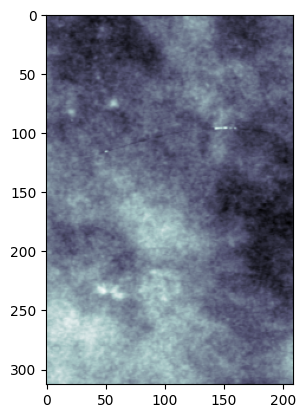

In [68]:
#Tamañ original
plt.imshow(pydicom.dcmread(X_train[100]).pixel_array, cmap=plt.cm.bone) # Img Original

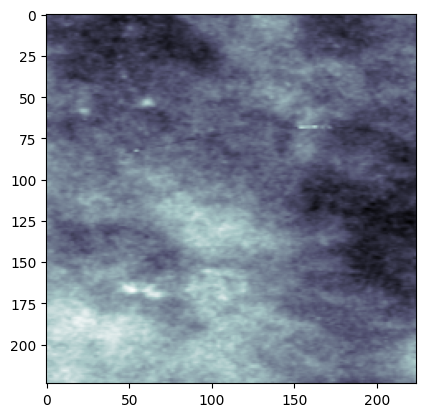

In [69]:
#Imagen con resize
plt.imshow(resize_dicom(pydicom.dcmread(X_train[100]),224,224), cmap=plt.cm.bone) #Img con resize

# Obtencion de imagenes como tensores

In [70]:
#Funcion que les hace resize a las imagenes y obtiene los pixeles resultantes den forma de tensores
def genera_tensores_train_test(width,height,lista_de_rutas):
    """
    width a redimensionar
    height a redimensionar
    lista de rutas
    """
    imgs_tensores = []

    for file in list(lista_de_rutas):
        read_img_dicom = pydicom.dcmread(file) #Lectura imgs DICOM
        img_tensor = resize_dicom(read_img_dicom,width,height) #Lammado a la funcion resize_dicom ---> Tensor de "16 bits" con dtype = float32
        imgs_tensores.append(img_tensor) #juntar los tensores
        
    # Convertir listas a (arrays de NumPy) Tensores
    imagenes = tf.stack(imgs_tensores) #Axis = 0 por default, concatena en vertical(columnas), axis = 1 en horizontal (filas). --->(num_imgs,width,height,1)
    return imagenes # Tensores 
        

## Obtencion de las imágenes como tensores

imgs_train, imgs_val e imgs_test

In [72]:
imgs_train = genera_tensores_train_test(224,224,X_train) 

In [73]:
len(imgs_train)

1828

In [74]:
imgs_val = genera_tensores_train_test(224,224,X_val) 

In [75]:
len(imgs_val)

458

In [76]:
imgs_test = genera_tensores_train_test(224,224,rutas_test) 

In [77]:
len(imgs_test)

600

# Preprocesamiento

In [90]:
# Convertir del rango (0-65535) a (0-255). Recordemos que  2**8 =  (DATOS(2**16)/2**8) neq (65535/65535)*255
train_images_comb = (imgs_train/65535)*255
val_images_comb = (imgs_val/65535)*255
test_images_comb = (imgs_test/65535)*255

In [91]:
#Replicate the only color channel (gray) 3 times, for Pre-trained Nets compatibility (se puede usar tf.TILE)
train_images_comb  = tf.image.grayscale_to_rgb(train_images_comb)
val_images_comb = tf.image.grayscale_to_rgb(val_images_comb)
test_images_comb = tf.image.grayscale_to_rgb(test_images_comb)

In [92]:
train_images_comb.shape

TensorShape([1828, 224, 224, 3])

In [93]:
val_images_comb.shape

TensorShape([458, 224, 224, 3])

In [94]:
test_images_comb

<tf.Tensor: shape=(600, 224, 224, 3), dtype=float32, numpy=
array([[[[187.30194 , 187.30194 , 187.30194 ],
         [194.69884 , 194.69884 , 194.69884 ],
         [202.8446  , 202.8446  , 202.8446  ],
         ...,
         [204.42036 , 204.42036 , 204.42036 ],
         [200.57391 , 200.57391 , 200.57391 ],
         [194.32703 , 194.32703 , 194.32703 ]],

        [[191.25677 , 191.25677 , 191.25677 ],
         [197.77573 , 197.77573 , 197.77573 ],
         [197.41817 , 197.41817 , 197.41817 ],
         ...,
         [203.89633 , 203.89633 , 203.89633 ],
         [196.87703 , 196.87703 , 196.87703 ],
         [188.38618 , 188.38618 , 188.38618 ]],

        [[189.96991 , 189.96991 , 189.96991 ],
         [188.18675 , 188.18675 , 188.18675 ],
         [194.10944 , 194.10944 , 194.10944 ],
         ...,
         [197.71562 , 197.71562 , 197.71562 ],
         [190.74237 , 190.74237 , 190.74237 ],
         [182.91028 , 182.91028 , 182.91028 ]],

        ...,

        [[179.8     , 179.8     

# Experimento

In [95]:
from keras import layers
from keras import models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications import ResNet50, InceptionV3, DenseNet121, MobileNetV2, VGG19, VGG16
#from keras.applications.vgg19 import preprocess_input as  vgg_preprocess_input
#from tensorflow.keras.applications.resnet50 import preprocess_input as res_preprocess_input
#from keras.applications.inception_v3 import preprocess_input as inv3_preprocess_input
#from keras.applications.densenet import preprocess_input as dens_preprocess_input
#from keras.applications.mobilenet_v2 import preprocess_input as mob_preprocess_input

Importante al seleccionar la red y el preprocess_input

In [96]:
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input as res_preprocess_input

# ResNet50

In [98]:
res_preprocess_input(test_images_comb)

<tf.Tensor: shape=(600, 224, 224, 3), dtype=float32, numpy=
array([[[[ 83.36294  ,  70.52294  ,  63.62194  ],
         [ 90.759834 ,  77.91984  ,  71.01884  ],
         [ 98.9056   ,  86.065605 ,  79.164604 ],
         ...,
         [100.48136  ,  87.641365 ,  80.740364 ],
         [ 96.63491  ,  83.794914 ,  76.89391  ],
         [ 90.38802  ,  77.54803  ,  70.647026 ]],

        [[ 87.31777  ,  74.477776 ,  67.576775 ],
         [ 93.83672  ,  80.99673  ,  74.095726 ],
         [ 93.479164 ,  80.63917  ,  73.73817  ],
         ...,
         [ 99.95733  ,  87.11733  ,  80.21633  ],
         [ 92.93803  ,  80.09803  ,  73.19703  ],
         [ 84.44718  ,  71.607185 ,  64.706184 ]],

        [[ 86.03091  ,  73.19091  ,  66.28991  ],
         [ 84.24775  ,  71.40775  ,  64.50675  ],
         [ 90.17043  ,  77.33044  ,  70.429436 ],
         ...,
         [ 93.77662  ,  80.93662  ,  74.03562  ],
         [ 86.80337  ,  73.96337  ,  67.06237  ],
         [ 78.971275 ,  66.13128  ,  59.2302

In [99]:
# Preprocess the test images
test_preprocess = res_preprocess_input(test_images_comb)

MODELO

In [100]:
def create_res(fc_size, verbose=False, dropout=None): #fc_size=Número de neuronas finales
  res_base = ResNet50(weights='imagenet', #Base convolucional CORRESPONDIENTE
                       include_top=False,
                       input_shape=(224,224, 3)) # Modifica según el tipo de entrada
  res = models.Sequential()
  res.add(res_base)

  res.add(layers.Flatten())
  if dropout is not None:
    res.add(layers.Dropout(dropout, seed=42)) # SEMILLA
  res.add(layers.Dense(fc_size, activation='relu'))
  res.add(layers.Dense(1, activation='sigmoid')) # TIPO de PROBLEA: Binario o Multietiqueta

  # Freeze the convolutional base
  res_base.trainable = False

  if verbose:
    res_base.summary()
    res.summary()

  return res

In [101]:
Ejemplo = create_res(512, verbose=True)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [102]:
train_datagen_HARD_res = ImageDataGenerator(
    preprocessing_function = res_preprocess_input, #Preprocess indicado
    #validation_split=0.2, #!!! Separa en validación y entrenamiento !!!
    rotation_range=180,
    width_shift_range=0.2,#N
    height_shift_range=0.2, #N
    shear_range=15, #N Originalmente 10
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect',
)

# Fit the generator with some images
train_datagen_HARD_res.fit(train_images_comb) #nombre
val_datagen_res = ImageDataGenerator(preprocessing_function = res_preprocess_input) #Preprocess_input adecuada 

# Split train images into actual training and validation
train_generator_HARD_res = train_datagen_HARD_res.flow(train_images_comb, y_train, batch_size=128, shuffle=False)#, subset='training')
validation_generator_res = val_datagen_res.flow(val_images_comb, y_val, batch_size=128,shuffle=False)#, subset='validation')
#Se comenta subset ya que se ocupan distintos conjuntos de entrenamiento y validación, shuffle=True por default


In [95]:
fc_size = 1024
res_fe_DO_H = create_res(fc_size = fc_size,dropout=0.5)

# Early stopping (stop training after the validation loss reaches the minimum)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_fe_2cl_M-C_best'+f'_{fc_size}_DO_HARD.h5',#NOMBRE
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)

# Compile the model
res_fe_DO_H.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) # Cambiar el loss dependiendo del problema

In [96]:
# Train
history_res_fe_DO_H = res_fe_DO_H.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(X_train) // 128, #len(train_generator_HARD_res), #n_train_img // 128, modificar 128 si se modifica el batch size
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps=len(X_val)//128, #Parametro a usar dependiendo si se dispone de validation data
        callbacks= [checkpoint, earlystopping],
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_fe_DO_H, 'res_fe_2cl_M-C_end'+f'_{fc_size}_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_13540\3460245029.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_res_fe_DO_H = res_fe_DO_H.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 29.4078 - accuracy: 0.6579
Epoch 1: val_loss improved from inf to 0.45101, saving model to res_fe_2cl_M-C_best_1024_DO_HARD.h5
14/14 [==============================] - 20s 1s/step - loss: 29.4078 - accuracy: 0.6579 - val_loss: 0.4510 - val_accuracy: 0.7786
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.5187 - accuracy: 0.7623
Epoch 2: val_loss improved from 0.45101 to 0.43139, saving model to res_fe_2cl_M-C_best_1024_DO_HARD.h5
14/14 [==============================] - 18s 1s/step - loss: 0.5187 - accuracy: 0.7623 - val_loss: 0.4314 - val_accuracy: 0.7995
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.7645
Epoch 3: val_loss did not improve from 0.43139
14/14 [==============================] - 7s 483ms/step - loss: 0.5682 - accuracy: 0.7645 - val_loss: 0.6704 - val_accuracy: 0.7188
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 0.60

In [97]:
#History of accuracy and loss
tra_loss_fe = history_res_fe_DO_H.history['loss'] # 
tra_acc_fe = history_res_fe_DO_H.history['accuracy'] #######
val_loss_fe = history_res_fe_DO_H.history['val_loss'] ########
val_acc_fe = history_res_fe_DO_H.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set 
opt_res_fe_DO_H = models.load_model('res_fe_2cl_M-C_best'+f'_{fc_size}_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = res_fe_DO_H.evaluate(test_images_comb, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_res_fe_DO_H.evaluate(test_images_comb, etiq_test, verbose=False) ##

print(f"ResNet50 Feature Extraction W/ dropout Hard DA {fc_size}\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

#OBSERVACIÓN: Se debe evaluar en test_preprocess y no en test_images_comb:

#test_loss_fe, test_acc_fe = res_fe_DO_H.evaluate(test_preprocess, etiq_test, verbose=False) #######Evalua modelo
#opt_test_loss_fe, opt_test_acc_fe = opt_res_fe_DO_H.evaluate(test_preprocess, etiq_test, verbose=False) ##
#La evaluación correcta en el Test con el modelo óptimo se hizo abajo. Este error NO afecta el entrenamiento,
#ya que la función res_preprocess_input fue ingresada en el ImageDataGenerator


ResNet50 Feature Extraction W/ dropout Hard DA 1024

Epoch [end]: 118
Epoch [opt]: 88
Valid accuracy [end]: 0.9089
Valid accuracy [opt]: 0.9219
Test accuracy [end]:  0.5000
Test accuracy [opt]:  0.5067
Valid loss [end]: 0.2669
Valid loss [opt]: 0.2280
Test loss [end]:  4.6565
Test loss [opt]:  4.4469


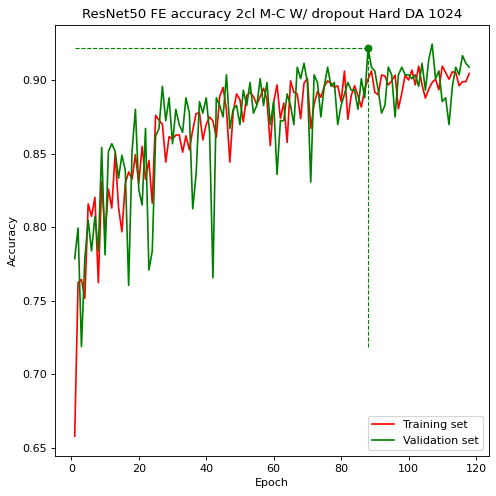

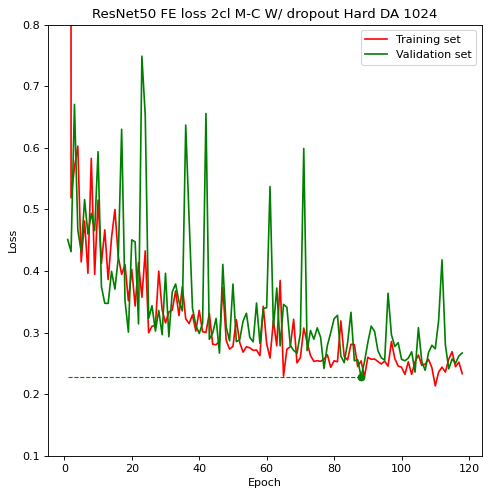

In [98]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title(f'ResNet50 FE accuracy 2cl M-C W/ dropout Hard DA {fc_size}')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title(f'ResNet50 FE loss 2cl M-C W/ dropout Hard DA {fc_size}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [103]:
mod_1024 = models.load_model(r'res_fe_2cl_M-C_best_1024_DO_HARD.h5')
mod_1024.evaluate(test_preprocess, etiq_test) #8866

19/19 [==============================] - 3s 24ms/step - loss: 0.3139 - accuracy: 0.8867


[0.31393712759017944, 0.8866666555404663]

ResNet50 Feature Extraction W/ dropout Hard DA 1024

- Epoch [end]: 118
- Epoch [opt]: 88
- Valid accuracy [end]: 0.9089
- Valid accuracy [opt]: 0.9219
- Test accuracy [end]:  0.5000
- Test accuracy [opt]:  0.5067
- Valid loss [end]: 0.2669
- Valid loss [opt]: 0.2280
- Test loss [end]:  4.6565
- Test loss [opt]:  4.4469

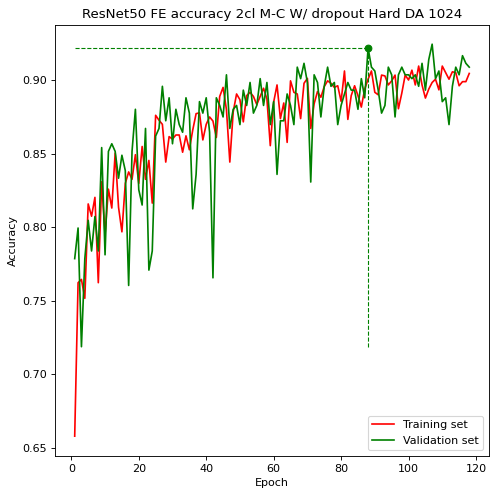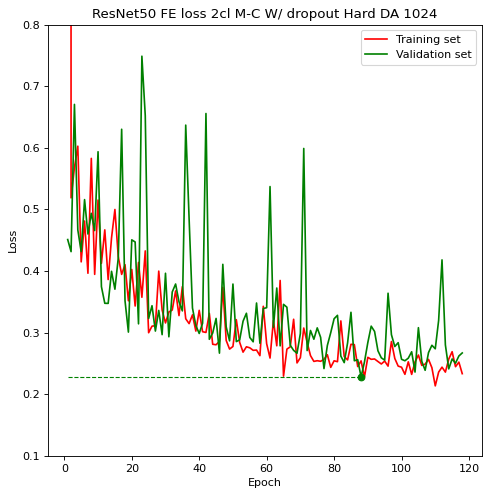

In [104]:
mod_256 = models.load_model(r'res_fe_2cl_M-C_best_256_DO_HARD.h5') #FT
mod_256.evaluate(test_preprocess, etiq_test) #8883

19/19 [==============================] - 1s 33ms/step - loss: 0.2969 - accuracy: 0.8883


[0.29690709710121155, 0.8883333206176758]

ResNet50 Feature Extraction W/ dropout Hard DA 256

- Epoch [end]: 102
- Epoch [opt]: 72
- Valid accuracy [end]: 0.8958
- Valid accuracy [opt]: 0.9141
- Test accuracy [end]:  0.5083
- Test accuracy [opt]:  0.5217
- Valid loss [end]: 0.2727
- Valid loss [opt]: 0.2514
- Test loss [end]:  3.5160
- Test loss [opt]:  2.6280

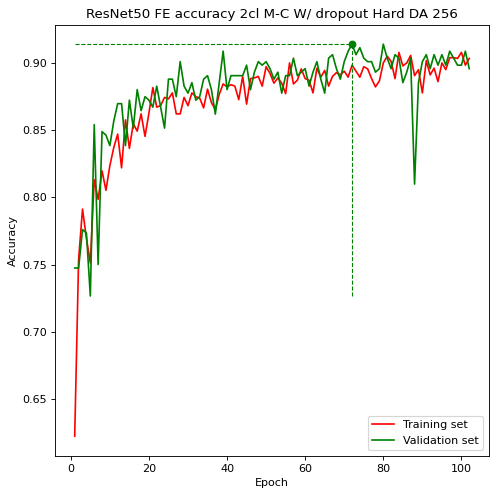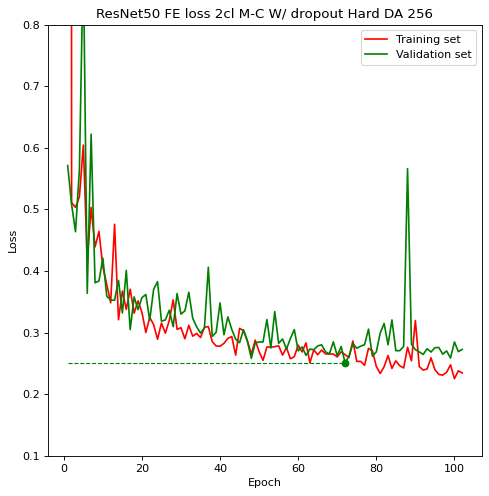

In [93]:
del res_fe_DO_H

In [94]:
del history_res_fe_DO_H

# Fine Tuning 1layer


In [103]:
from tensorflow.keras.optimizers import RMSprop

In [104]:
res_FT_1layer = models.load_model(r'res_fe_2cl_M-C_best_256_DO_HARD.h5') 

fine_tuned_from_1layer = 143

#Fine Tuning: unfreeze the last convolutional layer
for layer in res_FT_1layer.layers[0].layers[:fine_tuned_from_1layer]:
    layer.trainable = False

for layer in res_FT_1layer.layers[0].layers[fine_tuned_from_1layer:]:
    layer.trainable = True

# Recompile the model
res_FT_1layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

#res_FT_1layer.summary()

In [105]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) 

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_FT_1layer_2cl_M-C_best_256_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [106]:
# Train
history_FT_1L = res_FT_1layer.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_res), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_FT_1layer, 'res_FT_1layer_2cl_M-C_end_256_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_20516\1617949140.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_1L = res_FT_1layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 2.9258 - accuracy: 0.7896
Epoch 1: val_loss improved from inf to 0.76409, saving model to res_FT_1layer_2cl_M-C_best_256_DO_HARD.h5
14/14 [==============================] - 17s 852ms/step - loss: 2.9258 - accuracy: 0.7896 - val_loss: 0.7641 - val_accuracy: 0.7891
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.6501 - accuracy: 0.8672
Epoch 2: val_loss improved from 0.76409 to 0.62793, saving model to res_FT_1layer_2cl_M-C_best_256_DO_HARD.h5
14/14 [==============================] - 15s 1s/step - loss: 0.6501 - accuracy: 0.8672 - val_loss: 0.6279 - val_accuracy: 0.8203
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.5133 - accuracy: 0.8711
Epoch 3: val_loss improved from 0.62793 to 0.60423, saving model to res_FT_1layer_2cl_M-C_best_256_DO_HARD.h5
14/14 [==============================] - 15s 1s/step - loss: 0.5133 - accuracy: 0.8711 - val_loss: 0.6042 - val_accuracy: 0.8568

In [145]:
#History of accuracy and loss
tra_loss_fe = history_FT_1L.history['loss'] # 
tra_acc_fe = history_FT_1L.history['accuracy'] #######
val_loss_fe = history_FT_1L.history['val_loss'] ########
val_acc_fe = history_FT_1L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set 
opt_res_FT = models.load_model('res_FT_1layer_2cl_M-C_best_256_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = res_FT_1layer.evaluate(test_images_comb, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_res_FT.evaluate(test_images_comb, etiq_test, verbose=False) ##

print("res Fine Tunig 1 Layer (W/ dropout Hard DA)\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

#Se debe evaluar en test_preprocess (abajo)

VGG19 Fine Tunig 1 Layer (W/ dropout Hard DA)

Epoch [end]: 131
Epoch [opt]: 51
Valid accuracy [end]: 0.8802
Valid accuracy [opt]: 0.8776
Test accuracy [end]:  0.8550
Test accuracy [opt]:  0.8100
Valid loss [end]: 0.5161
Valid loss [opt]: 0.3824
Test loss [end]:  0.4848
Test loss [opt]:  0.5681


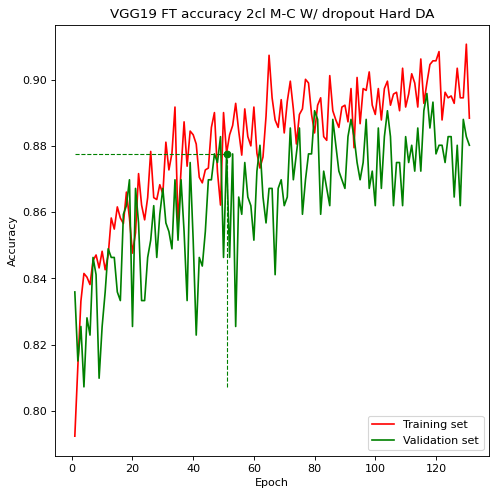

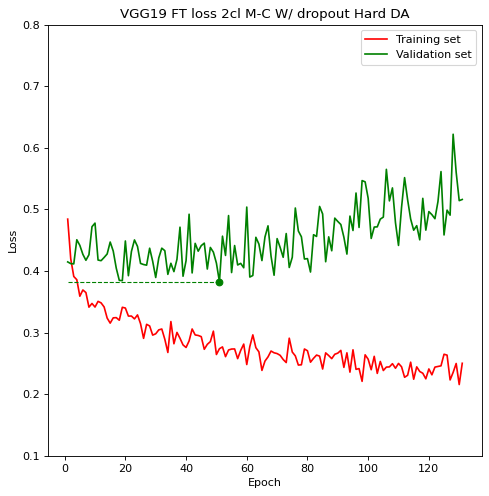

In [146]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT accuracy 2cl M-C W/ dropout Hard DA 256')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet FT loss 2cl M-C W/ dropout Hard DA 256')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [107]:
mod_256_FT_1 = models.load_model(r'res_FT_1layer_2cl_M-C_best_256_DO_HARD.h5') #FT
mod_256_FT_1.evaluate(test_preprocess, etiq_test) #8966

19/19 [==============================] - 1s 27ms/step - loss: 0.7024 - accuracy: 0.8967


[0.7024105787277222, 0.8966666460037231]

# Fine Tuning 2 layers

In [108]:
res_FT_2layer = models.load_model('res_FT_1layer_2cl_M-C_best_256_DO_HARD.h5') 

fine_tuned_from_2layer = 81

#Fine Tuning: unfreeze the last convolutional layer
for layer in res_FT_2layer.layers[0].layers[:fine_tuned_from_2layer]:
    layer.trainable = False

for layer in res_FT_2layer.layers[0].layers[fine_tuned_from_2layer:]:
    layer.trainable = True

# Recompile the model
res_FT_2layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

#res_FT_2layer.summary()

In [109]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1)

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_FT_2layer_2cl_M-C_best_256_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [110]:
# Train
history_FT_2L = res_FT_2layer.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_res), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_FT_2layer, 'res_FT_2layer_2cl_M-C_end_256_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_20516\3539530358.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_2L = res_FT_2layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 0.4550 - accuracy: 0.8744
Epoch 1: val_loss improved from inf to 14.06659, saving model to res_FT_2layer_2cl_M-C_best_256_DO_HARD.h5
14/14 [==============================] - 16s 870ms/step - loss: 0.4550 - accuracy: 0.8744 - val_loss: 14.0666 - val_accuracy: 0.8750
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.9057
Epoch 2: val_loss improved from 14.06659 to 9.70245, saving model to res_FT_2layer_2cl_M-C_best_256_DO_HARD.h5
14/14 [==============================] - 15s 1s/step - loss: 0.2565 - accuracy: 0.9057 - val_loss: 9.7025 - val_accuracy: 0.8646
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.2010 - accuracy: 0.9185
Epoch 3: val_loss improved from 9.70245 to 8.80359, saving model to res_FT_2layer_2cl_M-C_best_256_DO_HARD.h5
14/14 [==============================] - 15s 1s/step - loss: 0.2010 - accuracy: 0.9185 - val_loss: 8.8036 - val_accuracy: 0.8

In [111]:
#History of accuracy and loss
tra_loss_fe = history_FT_2L.history['loss'] # 
tra_acc_fe = history_FT_2L.history['accuracy'] #######
val_loss_fe = history_FT_2L.history['val_loss'] ########
val_acc_fe = history_FT_2L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set 
opt_res_FT_2L = models.load_model('res_FT_2layer_2cl_M-C_best_256_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = res_FT_2layer.evaluate(test_images_comb, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_res_FT_2L.evaluate(test_images_comb, etiq_test, verbose=False) ##

print("res Fine Tunig 2 Layer (W/ dropout Hard DA)\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

#Se debe evaluar en test_preproces (anbajo)

res Fine Tunig 2 Layer (W/ dropout Hard DA)

Epoch [end]: 56
Epoch [opt]: 26
Valid accuracy [end]: 0.8516
Valid accuracy [opt]: 0.9297
Test accuracy [end]:  0.5150
Test accuracy [opt]:  0.7633
Valid loss [end]: 48.1493
Valid loss [opt]: 0.5390
Test loss [end]:  90.5634
Test loss [opt]:  1.1945


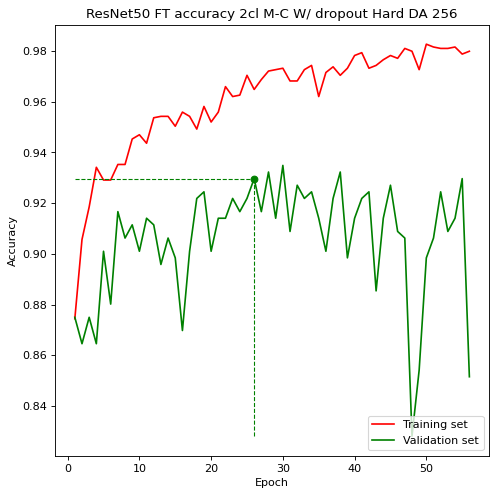

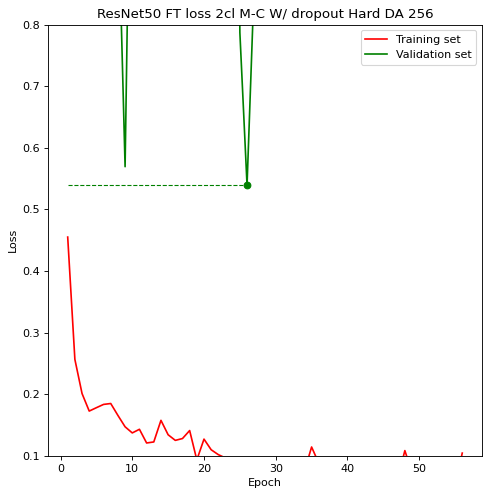

In [112]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT accuracy 2cl M-C W/ dropout Hard DA 256')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT loss 2cl M-C W/ dropout Hard DA 256')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

In [101]:
mod_256_FT_2 = models.load_model(r'res_FT_2layer_2cl_M-C_best_256_DO_HARD.h5') 
mod_256_FT_2.evaluate(test_preprocess, etiq_test) #9200

19/19 [==============================] - 3s 37ms/step - loss: 0.6654 - accuracy: 0.9200


[0.6654275059700012, 0.9200000166893005]

# Vemos la Matriz de confusió con el modelo de 256 Neuronas

In [110]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
class_labels = ['Mass','Calc']

In [112]:
def plot_mc_nets(Model,name_model,X_test,y_test,threshold=0.5):
    y_pred_proba = Model.predict(X_test)
    y_pred_class = (y_pred_proba>=threshold).astype(int)
    
    print('Accuracy:', accuracy_score(y_test,y_pred_class))
    print('f1:', f1_score(y_test,y_pred_class))
    print('Matthews:', matthews_corrcoef(y_test,y_pred_class))
    print('Precision:', precision_score(y_test,y_pred_class))
    print('Recall:', recall_score(y_test,y_pred_class))
    cm = confusion_matrix(y_test,y_pred_class)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True, cmap='Blues',fmt='d',cbar=False, xticklabels=class_labels,yticklabels=class_labels)
    plt.title(f'Modelo {name_model}')
    
    plt.show


19/19 [==============================] - 1s 41ms/step
Accuracy: 0.92
f1: 0.9058823529411765
Matthews: 0.8366581745405279
Precision: 0.9203187250996016
Recall: 0.8918918918918919


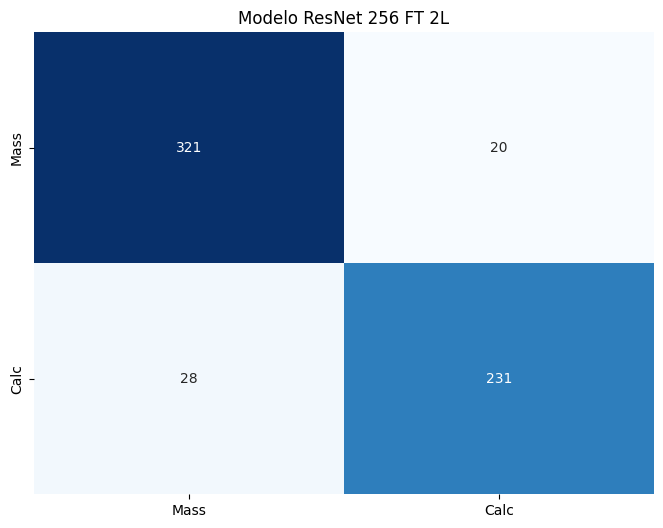

In [105]:
plot_mc_nets(mod_256_FT_2,'ResNet 256 FT 2L',test_preprocess,etiq_test)

# FT 3 Layers

In [104]:
res_FT_3layer = models.load_model(r'res_FT_2layer_2cl_M-C_best_256_DO_HARD.h5') 

fine_tuned_from_3layer = 39

#Fine Tuning: unfreeze the last convolutional layer
for layer in res_FT_3layer.layers[0].layers[:fine_tuned_from_3layer]:
    layer.trainable = False

for layer in res_FT_3layer.layers[0].layers[fine_tuned_from_3layer:]:
    layer.trainable = True

# Recompile the model
res_FT_3layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

#res_FT_1layer.summary()

In [105]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) 

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_FT_3layer_2cl_M-C_best_256_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [106]:
# Train
history_FT_3L = res_FT_3layer.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_res), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_FT_3layer, 'res_FT_3layer_2cl_M-C_end_256_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_15732\3119723733.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_3L = res_FT_3layer.fit_generator(


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 0.2679 - accuracy: 0.9252
Epoch 1: val_loss improved from inf to 2.02852, saving model to res_FT_3layer_2cl_M-C_best_256_DO_HARD.h5
14/14 [==============================] - 24s 943ms/step - loss: 0.2679 - accuracy: 0.9252 - val_loss: 2.0285 - val_accuracy: 0.9036
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 0.1578 - accuracy: 0.9487
Epoch 2: val_loss did not improve from 2.02852
14/14 [==============================] - 8s 506ms/step - loss: 0.1578 - accuracy: 0.9487 - val_loss: 7.4138 - val_accuracy: 0.8958
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.2513 - accuracy: 0.9436
Epoch 3: val_loss did not improve from 2.02852
14/14 [==============================] - 8s 517ms/step - loss: 0.2513 - accuracy: 0.9436 - val_loss: 15.7655 - val_accuracy: 0.8750
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 0.1277 - accuracy: 0.9537
Epoch 4: val_loss did not

In [108]:
#History of accuracy and loss
tra_loss_fe = history_FT_3L.history['loss'] # 
tra_acc_fe = history_FT_3L.history['accuracy'] #######
val_loss_fe = history_FT_3L.history['val_loss'] ########
val_acc_fe = history_FT_3L.history['val_accuracy'] #########

# Total number of epochs training
epochs_fe = range(1, len(tra_acc_fe)+1)
end_epoch_fe = len(tra_acc_fe)

# Epoch when reached the validation loss minimum
opt_epoch_fe = val_loss_fe.index(min(val_loss_fe)) + 1

# Loss and accuracy on the validation set
end_val_loss_fe = val_loss_fe[-1]
end_val_acc_fe = val_acc_fe[-1]
opt_val_loss_fe = val_loss_fe[opt_epoch_fe-1]
opt_val_acc_fe = val_acc_fe[opt_epoch_fe-1]

# Loss and accuracy on the test set 
opt_res_FT_3L = models.load_model('res_FT_3layer_2cl_M-C_best_256_DO_HARD.h5') #####Carga el modelo 
test_loss_fe, test_acc_fe = res_FT_3layer.evaluate(test_preprocess, etiq_test, verbose=False) #######Evalua modelo
opt_test_loss_fe, opt_test_acc_fe = opt_res_FT_3L.evaluate(test_preprocess, etiq_test, verbose=False) ##

print("res Fine Tunig 3 Layer (W/ dropout Hard DA)\n")

print("Epoch [end]: %d" % end_epoch_fe)
print("Epoch [opt]: %d" % opt_epoch_fe)
print("Valid accuracy [end]: %.4f" % end_val_acc_fe)
print("Valid accuracy [opt]: %.4f" % opt_val_acc_fe)
print("Test accuracy [end]:  %.4f" % test_acc_fe)
print("Test accuracy [opt]:  %.4f" % opt_test_acc_fe)
print("Valid loss [end]: %.4f" % end_val_loss_fe)
print("Valid loss [opt]: %.4f" % opt_val_loss_fe)
print("Test loss [end]:  %.4f" % test_loss_fe)
print("Test loss [opt]:  %.4f" % opt_test_loss_fe)

res Fine Tunig 3 Layer (W/ dropout Hard DA)

Epoch [end]: 47
Epoch [opt]: 17
Valid accuracy [end]: 0.8385
Valid accuracy [opt]: 0.9401
Test accuracy [end]:  0.8100
Test accuracy [opt]:  0.9250
Valid loss [end]: 36.5926
Valid loss [opt]: 0.5573
Test loss [end]:  25.5788
Test loss [opt]:  0.5681


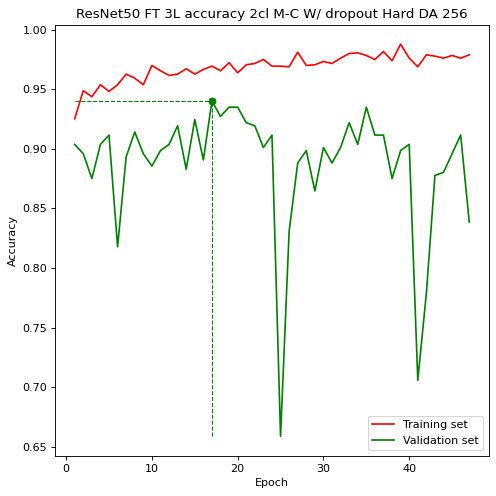

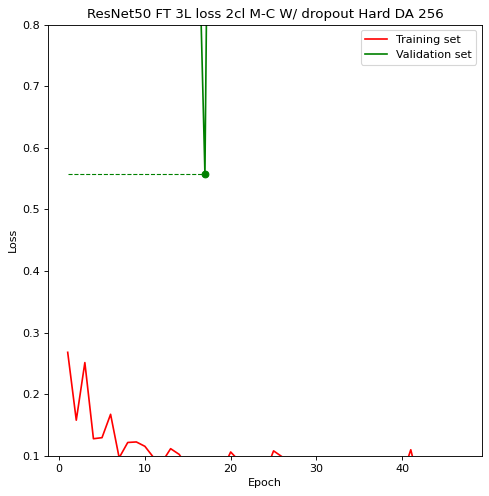

In [109]:
# Model accuracy
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT 3L accuracy 2cl M-C W/ dropout Hard DA 256')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs_fe, tra_acc_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_acc_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_acc_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_acc_fe), opt_val_acc_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_acc_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend(loc='lower right')

# Model loss
plt.figure(figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title('ResNet50 FT 3L loss 2cl M-C W/ dropout Hard DA 256')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.1,0.8)
plt.plot(epochs_fe, tra_loss_fe, 'r', label='Training set')
plt.plot(epochs_fe, val_loss_fe, 'g', label='Validation set')
plt.plot(opt_epoch_fe, val_loss_fe[opt_epoch_fe-1], 'go')
plt.vlines(opt_epoch_fe, min(val_loss_fe), opt_val_loss_fe, linestyle="dashed", color='g', linewidth=1)
plt.hlines(opt_val_loss_fe, 1, opt_epoch_fe, linestyle="dashed", color='g', linewidth=1)
plt.legend();

res Fine Tunig 3 Layer (W/ dropout Hard DA)

- Epoch [end]: 47
- Epoch [opt]: 17
- Valid accuracy [end]: 0.8385
- Valid accuracy [opt]: 0.9401
- Test accuracy [end]:  0.8100
- Test accuracy [opt]:  0.9250
- Valid loss [end]: 36.5926
- Valid loss [opt]: 0.5573
- Test loss [end]:  25.5788
- Test loss [opt]:  0.5681

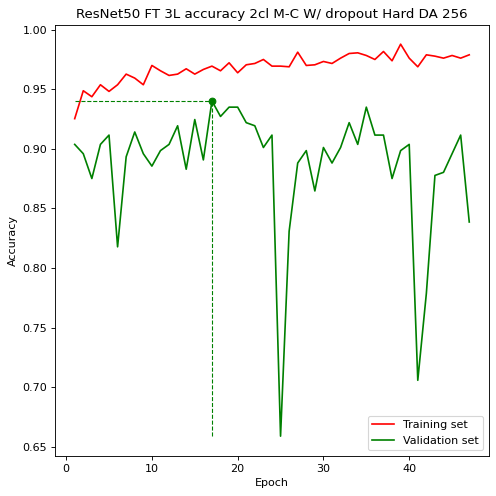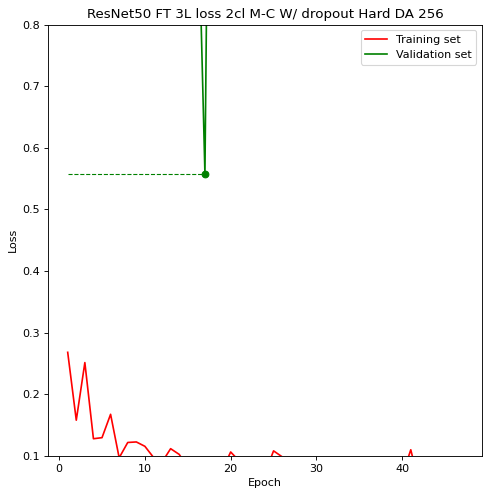

19/19 [==============================] - 1s 39ms/step
Accuracy: 0.925
f1: 0.9142857142857143
Matthews: 0.8478782790623833
Precision: 0.9022556390977443
Recall: 0.9266409266409267


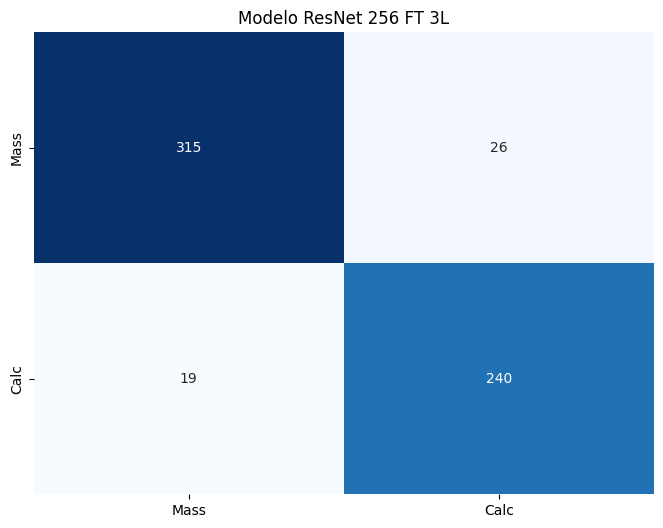

In [113]:
plot_mc_nets(opt_res_FT_3L,'ResNet 256 FT 3L',test_preprocess,etiq_test)#45 Imagenes

# FT 4 Layers---> OOM

In [104]:
res_FT_4layer = models.load_model(r'res_FT_3layer_2cl_M-C_best_256_DO_HARD.h5') 

fine_tuned_from_4layer = 7

#Fine Tuning: unfreeze the last convolutional layer
for layer in res_FT_4layer.layers[0].layers[:fine_tuned_from_4layer]:
    layer.trainable = False

for layer in res_FT_4layer.layers[0].layers[fine_tuned_from_4layer:]:
    layer.trainable = True

# Recompile the model
res_FT_4layer.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

#res_FT_1layer.summary()

In [105]:
# Early stopping (stop training after the validation loss reaches the minimum)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=30, verbose=1) 

# Callback for checkpointing
checkpoint = ModelCheckpoint('res_FT_4layer_2cl_M-C_best_256_DO_HARD.h5', #Nuevo nombre corresp al modelo cargado
        monitor='val_loss', mode='min', verbose=1,
        save_best_only=True, save_freq='epoch'
)


In [106]:
# Train
history_FT_4L = res_FT_4layer.fit_generator(
        train_generator_HARD_res, #Generador adecuado
        steps_per_epoch = len(X_train)//128, #len(train_generator_HARD_res), #n_train_img // 128 y GENERADOR CORRESP
        epochs=200,
        validation_data=validation_generator_res,## GENRADOR CORRESP
        validation_steps = len(X_val)//128,
        callbacks= [checkpoint, early_stop], #Cambia eary stopping arriba
        shuffle=False,
        verbose=1,
        initial_epoch=0
)

# Save
models.save_model(res_FT_4layer, 'res_FT_4layer_2cl_M-C_end_256_DO_HARD.h5') #Modelo correspondiente


C:\Users\uabc_\AppData\Local\Temp\ipykernel_23560\2083640195.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_FT_4L = res_FT_4layer.fit_generator(


Epoch 1/200
 1/14 [=>............................] - ETA: 43:04 - loss: 0.2455 - accuracy: 0.9062

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_1/resnet50/conv5_block3_3_bn/FusedBatchNormV3' defined at (most recent call last):
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\uabc_\AppData\Local\Temp\ipykernel_23560\2083640195.py", line 2, in <module>
      history_FT_4L = res_FT_4layer.fit_generator(
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\uabc_\anaconda3\envs\mammography\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 634, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_1/resnet50/conv5_block3_3_bn/FusedBatchNormV3'
OOM when allocating tensor with shape[128,7,7,2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_1/resnet50/conv5_block3_3_bn/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_42116]